<a href="https://colab.research.google.com/github/kushal-h/Data-Analysis-using-r/blob/main/Telecom_Churn_Analysis_DAR_final_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Analytics using R project**






**Project Title : Telecom Churn Analysis**

**Agenda of the project**

>1.Aim

>2.Loading in data and R libraries

>3.Data preprocessing

>4.Data visualization of descriptive statistics

>5.Statistical modeling

>6.Data visualization based on models

>7.Conclusion



























**1.Aim**



Customer churn, also known as customer attrition, is the loss of clients or customers. Churn is an important business metric for subscription-based services such as telecommunications companies. This project demonstrates a churn analysis using data downloaded from IBM sample data sets. We will use the R statistical programming languange in order to identify variables associated with customer churn.

In this project, we will carry out the following tasks:

Load the data and the relevant R libraries.
Preprocess the data with various cleaning and recoding techniques.
Provide data visualizations of descriptive statistics of the data
Fit models using statistical classification methods commonly used in churn analysis.
Decision tree analysis
Random forest analysis
Logistic regression
Examine additional data visualization of selected variables based on our modeling techniques.

**2.Loading in data and R libraries**


In [ ]:
install.packages("plyr")
install.packages("rpart.plot")
install.packages("randomForest")
install.packages("caret")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(plyr)
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
library(randomForest)

In [ ]:
library(rpart)
library(rpart.plot)
library(caret)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
library(ggplot2)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:randomForest’:

    combine




In [ ]:
dat <- read.csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
head(dat)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


Structure of dataframe

In [ ]:
str(dat)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

summmary of dataframe

In [ ]:
summary(dat)

  customerID           gender          SeniorCitizen      Partner         
 Length:7043        Length:7043        Min.   :0.0000   Length:7043       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.1621                     
                                       3rd Qu.:0.0000                     
                                       Max.   :1.0000                     
                                                                          
  Dependents            tenure      PhoneService       MultipleLines     
 Length:7043        Min.   : 0.00   Length:7043        Length:7043       
 Class :character   1st Qu.: 9.00   Class :character   Class :character  
 Mode  :character   Median :29.00   Mode  :character   Mode  :character  
                    Mean   :32.37                                        
                    3rd Qu.:55

**3.Data preprocessing**

In [ ]:
sapply(dat, function(x) sum(is.na(x)))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

In [ ]:
dat[is.na(dat$TotalCharges),]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
489,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,⋯,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NA,No
754,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NA,No
937,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,⋯,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NA,No
1083,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NA,No
1341,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,⋯,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NA,No
3332,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NA,No
3827,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NA,No
4381,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NA,No
5219,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NA,No


In [ ]:
sum(is.na(dat$TotalCharges))/nrow(dat)

[1] 0.001561834

In [ ]:
datc <- dat[complete.cases(dat), ]

In [ ]:
datc$SeniorCitizen <- as.factor(mapvalues(datc$SeniorCitizen,
                                          from=c("0","1"),
                                          to=c("No", "Yes")))

In [ ]:
datc$MultipleLines <- as.factor(mapvalues(datc$MultipleLines, 
                                           from=c("No phone service"),
                                           to=c("No")))

In [ ]:
for(i in 10:15){
  datc[,i] <- as.factor(mapvalues(datc[,i],
                                  from= c("No internet service"), to= c("No")))
}

coverting data into categorical variables

In [ ]:
datc$gender <- factor(datc$gender)
datc$Partner <- factor(datc$Partner)
datc$Dependents <- factor(datc$Dependents)
datc$PhoneService <- factor(datc$PhoneService)
datc$InternetService <- factor(datc$InternetService)
datc$Contract <- factor(datc$Contract)
datc$PaperlessBilling <- factor(datc$PaperlessBilling)
datc$PaymentMethod <- factor(datc$PaymentMethod)
datc$Churn <- factor(datc$Churn)


droping customerID

In [ ]:
datc$customerID <- NULL

In [ ]:
str(datc)

'data.frame':	7032 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 2 1 2 ...
 $ OnlineBackup    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 2 1 1 2 ...
 $ DeviceProtection: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ TechSupport     : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 2 1 ...
 $ StreamingTV     : Factor w/ 2 levels "No","Yes

In [ ]:
summary(datc)

    gender     SeniorCitizen Partner    Dependents     tenure      PhoneService
 Female:3483   No :5890      No :3639   No :4933   Min.   : 1.00   No : 680    
 Male  :3549   Yes:1142      Yes:3393   Yes:2099   1st Qu.: 9.00   Yes:6352    
                                                   Median :29.00               
                                                   Mean   :32.42               
                                                   3rd Qu.:55.00               
                                                   Max.   :72.00               
 MultipleLines    InternetService OnlineSecurity OnlineBackup DeviceProtection
 No :4065      DSL        :2416   No :5017       No :4607     No :4614        
 Yes:2967      Fiber optic:3096   Yes:2015       Yes:2425     Yes:2418        
               No         :1520                                               
                                                                              
                                             

In [ ]:
head(datc)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


70% of data for training

In [ ]:
set.seed(56)
split_train_test <- createDataPartition(datc$Churn,p=0.7,list=FALSE)
dtrain<- datc[split_train_test,]
dtest<- datc[-split_train_test,]

**4.Data visualization of descriptive statistics**

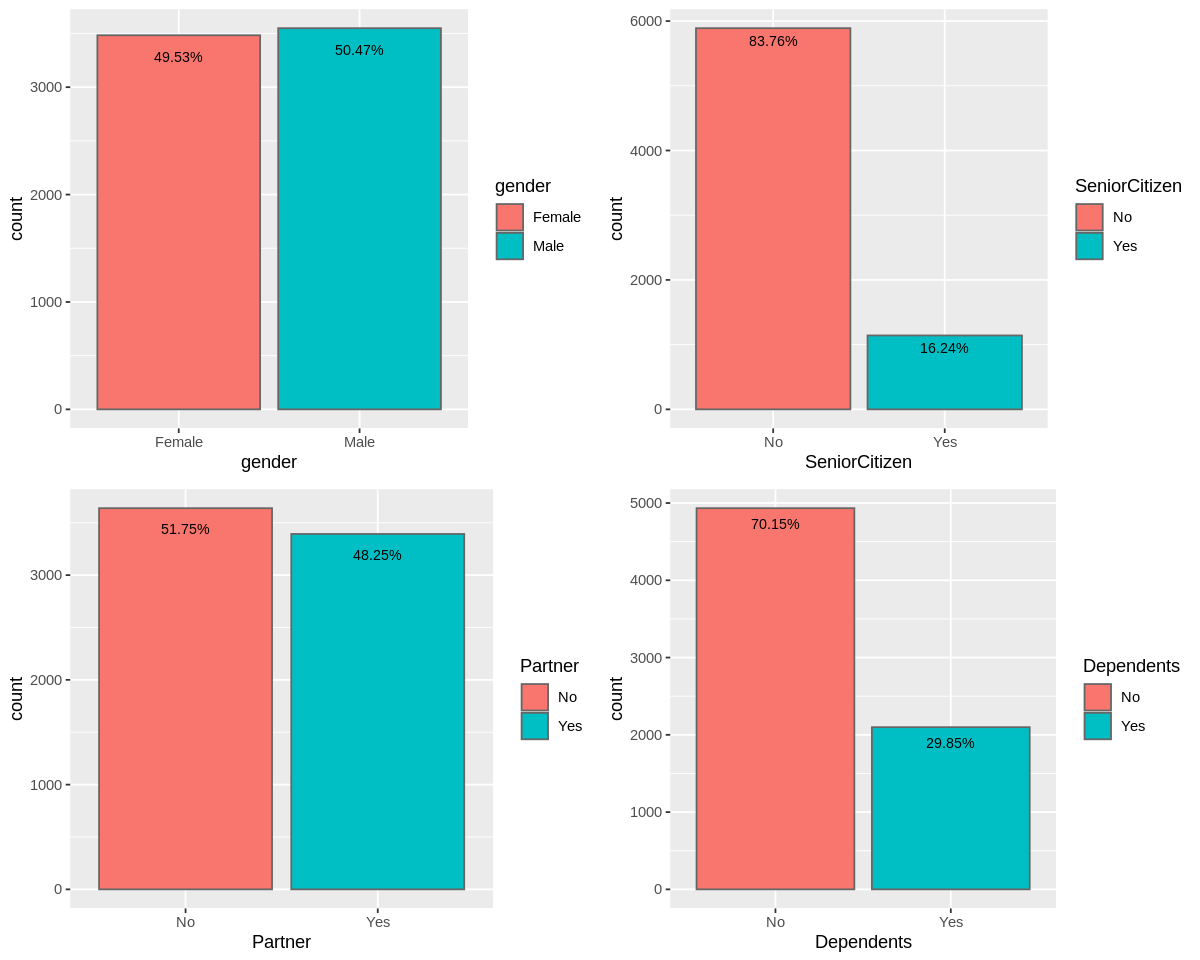

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)
#Gender plot
p1 <- ggplot(datc, aes(x = gender, fill= gender)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Senior citizen plot
p2 <- ggplot(datc, aes(x = SeniorCitizen, fill= SeniorCitizen)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Partner plot
p3 <- ggplot(datc, aes(x = Partner, fill=Partner)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Dependents plot
p4 <- ggplot(datc, aes(x = Dependents, fill= Dependents)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Plot demographic data within a grid
grid.arrange(p1, p2, p3, p4, ncol=2)


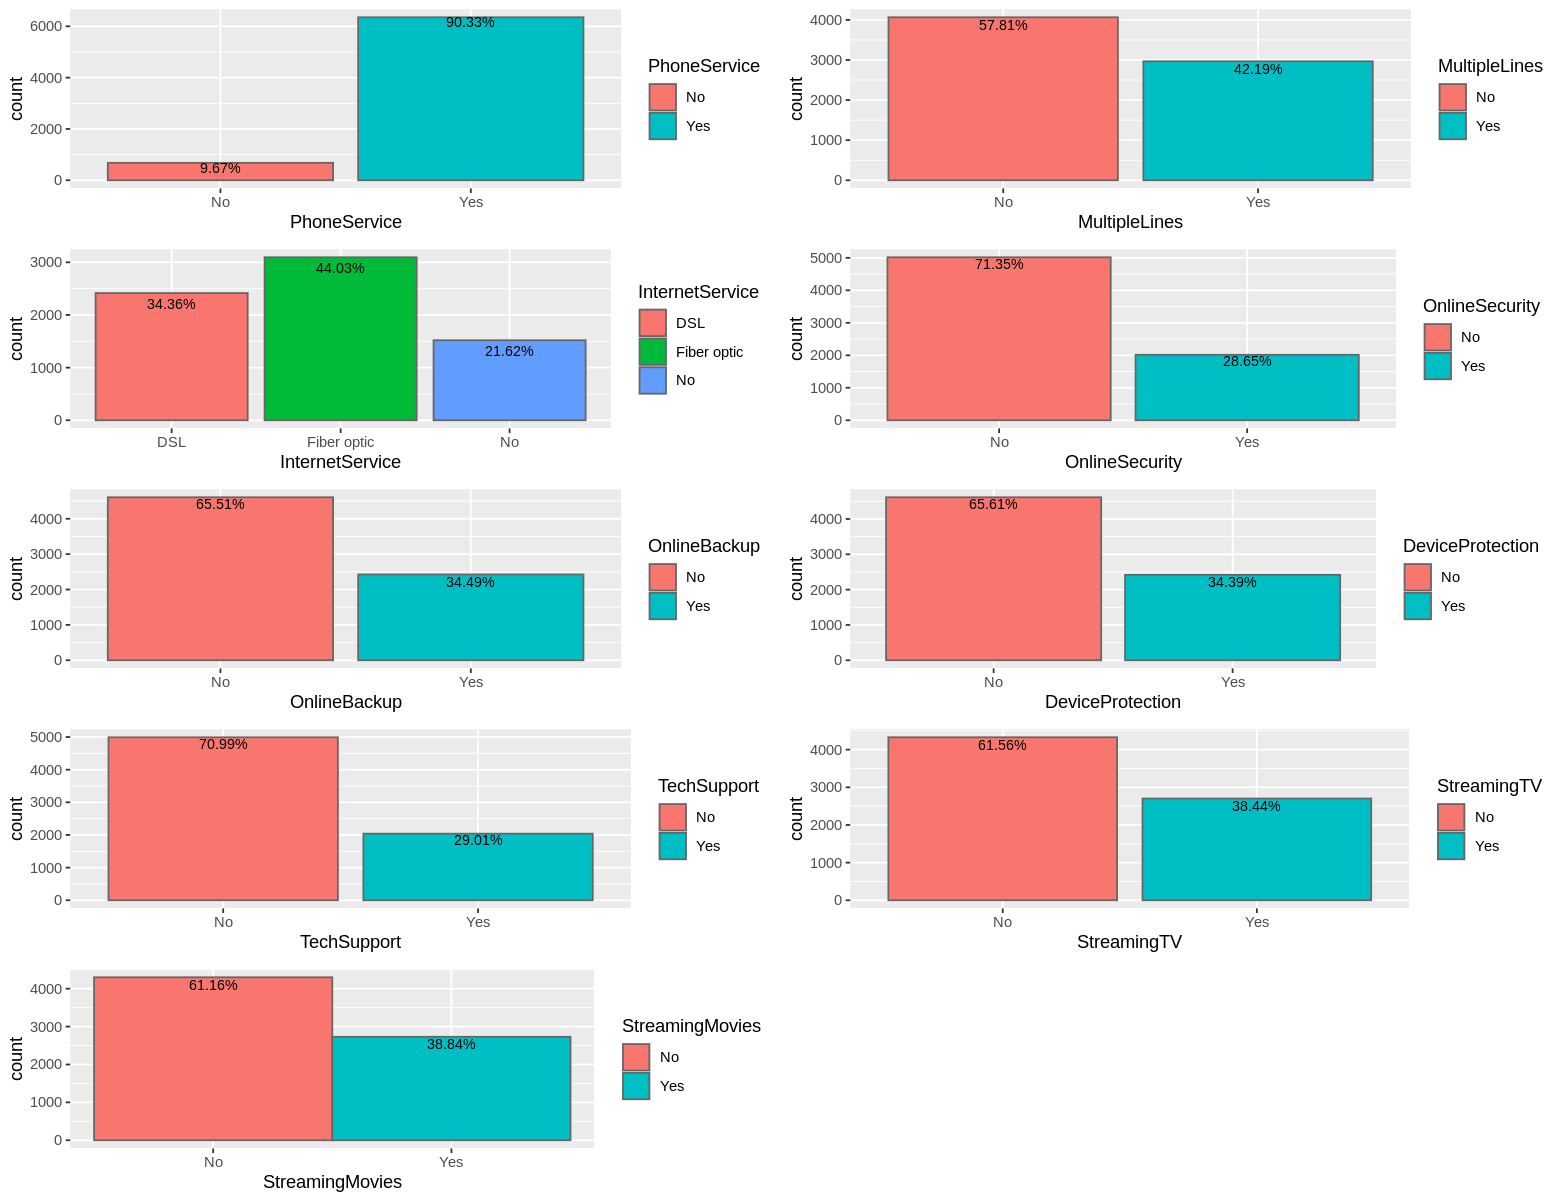

In [ ]:
options(repr.plot.width=13, repr.plot.height=10)
#Phone service plot
p5 <- ggplot(datc, aes(x = PhoneService, fill= PhoneService)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Multiple phone lines plot
p6 <- ggplot(datc, aes(x = MultipleLines, fill=MultipleLines)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Internet service plot
p7 <- ggplot(datc, aes(x = InternetService, fill=InternetService)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Online security service plot
p8 <- ggplot(datc, aes(x = OnlineSecurity, fill = OnlineSecurity)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Online backup service plot
p9 <- ggplot(datc, aes(x = OnlineBackup, fill= OnlineBackup)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Device Protection service plot
p10 <- ggplot(datc, aes(x = DeviceProtection, fill= DeviceProtection)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Tech Support service plot
p11 <- ggplot(datc, aes(x = TechSupport, fill= TechSupport)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Streaming TV service plot
p12 <- ggplot(datc, aes(x = StreamingTV, fill= StreamingTV)) +
  geom_bar(position = "dodge", color = "grey40") +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Streaming Movies service plot

p13 <- ggplot(datc, aes(x = StreamingMovies, fill=StreamingMovies)) +
  geom_bar(position = "dodge", color = "grey40", width = 1) +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Plot service data within a grid
grid.arrange(p5, p6, p7,
             p8, p9, p10,
             p11, p12, p13,
             ncol=2)

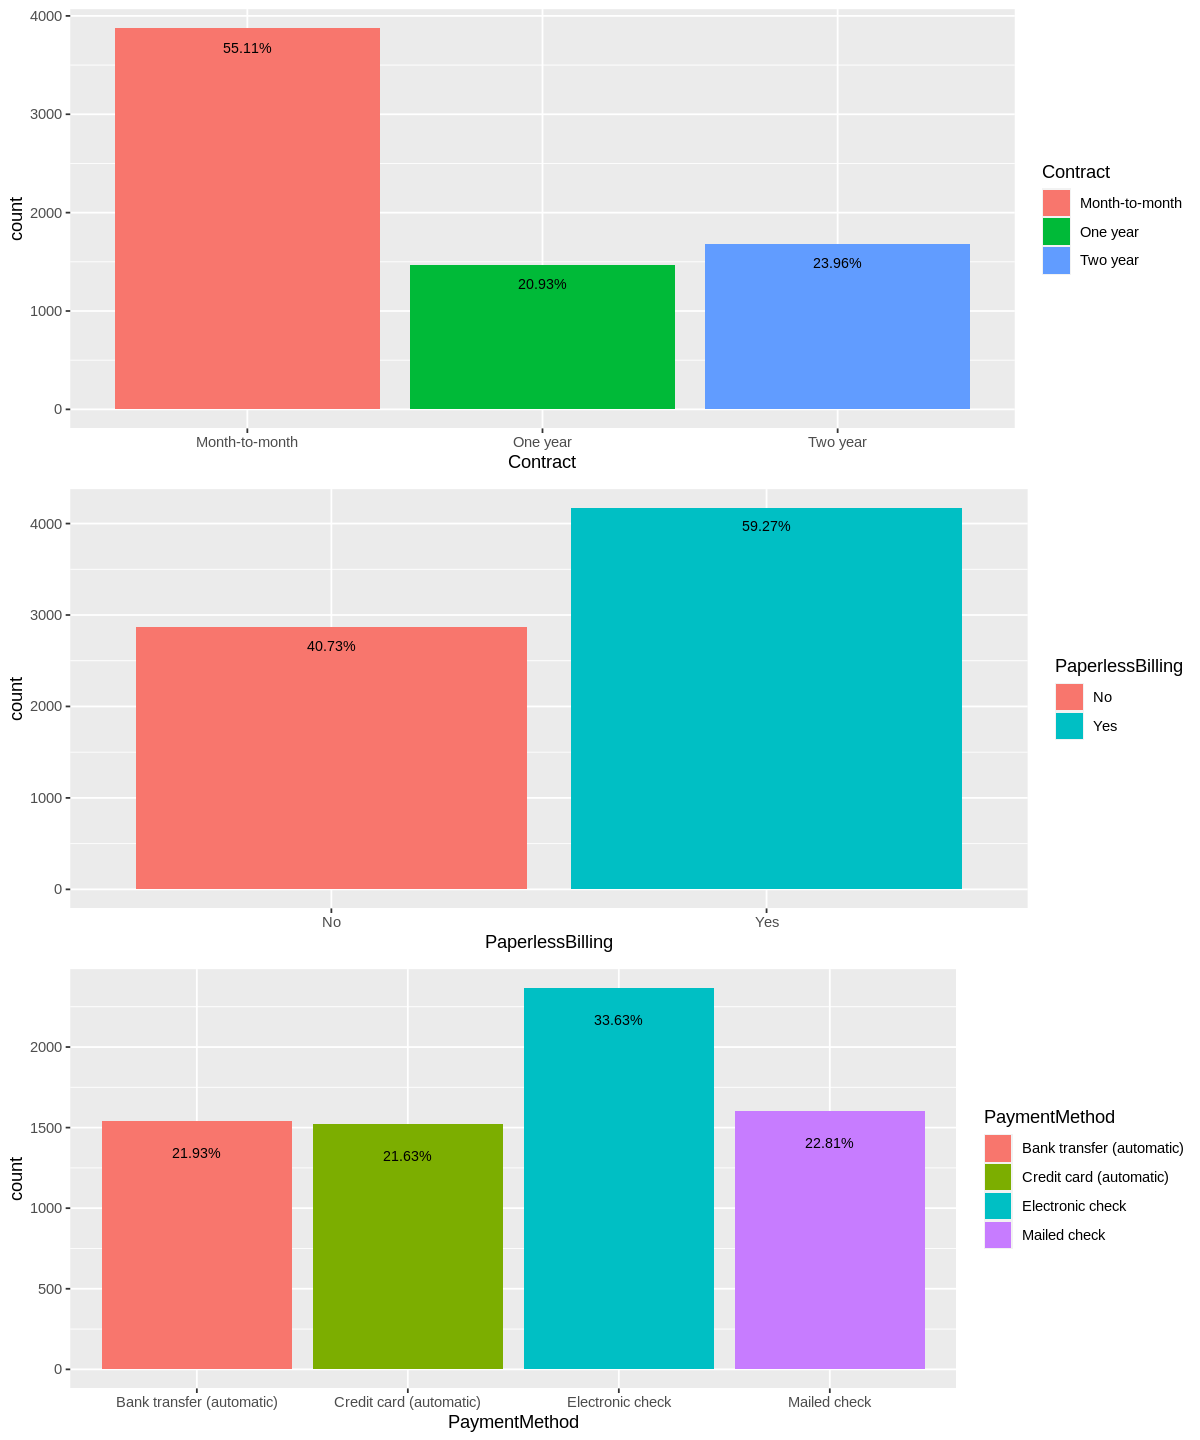

In [ ]:
options(repr.plot.width=10, repr.plot.height=12)
#Contract status plot
p14 <- ggplot(datc, aes(x = Contract, fill=Contract)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Paperless billing plot
p15 <- ggplot(datc, aes(x = PaperlessBilling, fill=PaperlessBilling )) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Payment method plot
p16 <- ggplot(datc, aes(x = PaymentMethod, fill=PaymentMethod )) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)

#Plot contract data within a grid
grid.arrange(p14, p15, p16, ncol=1)

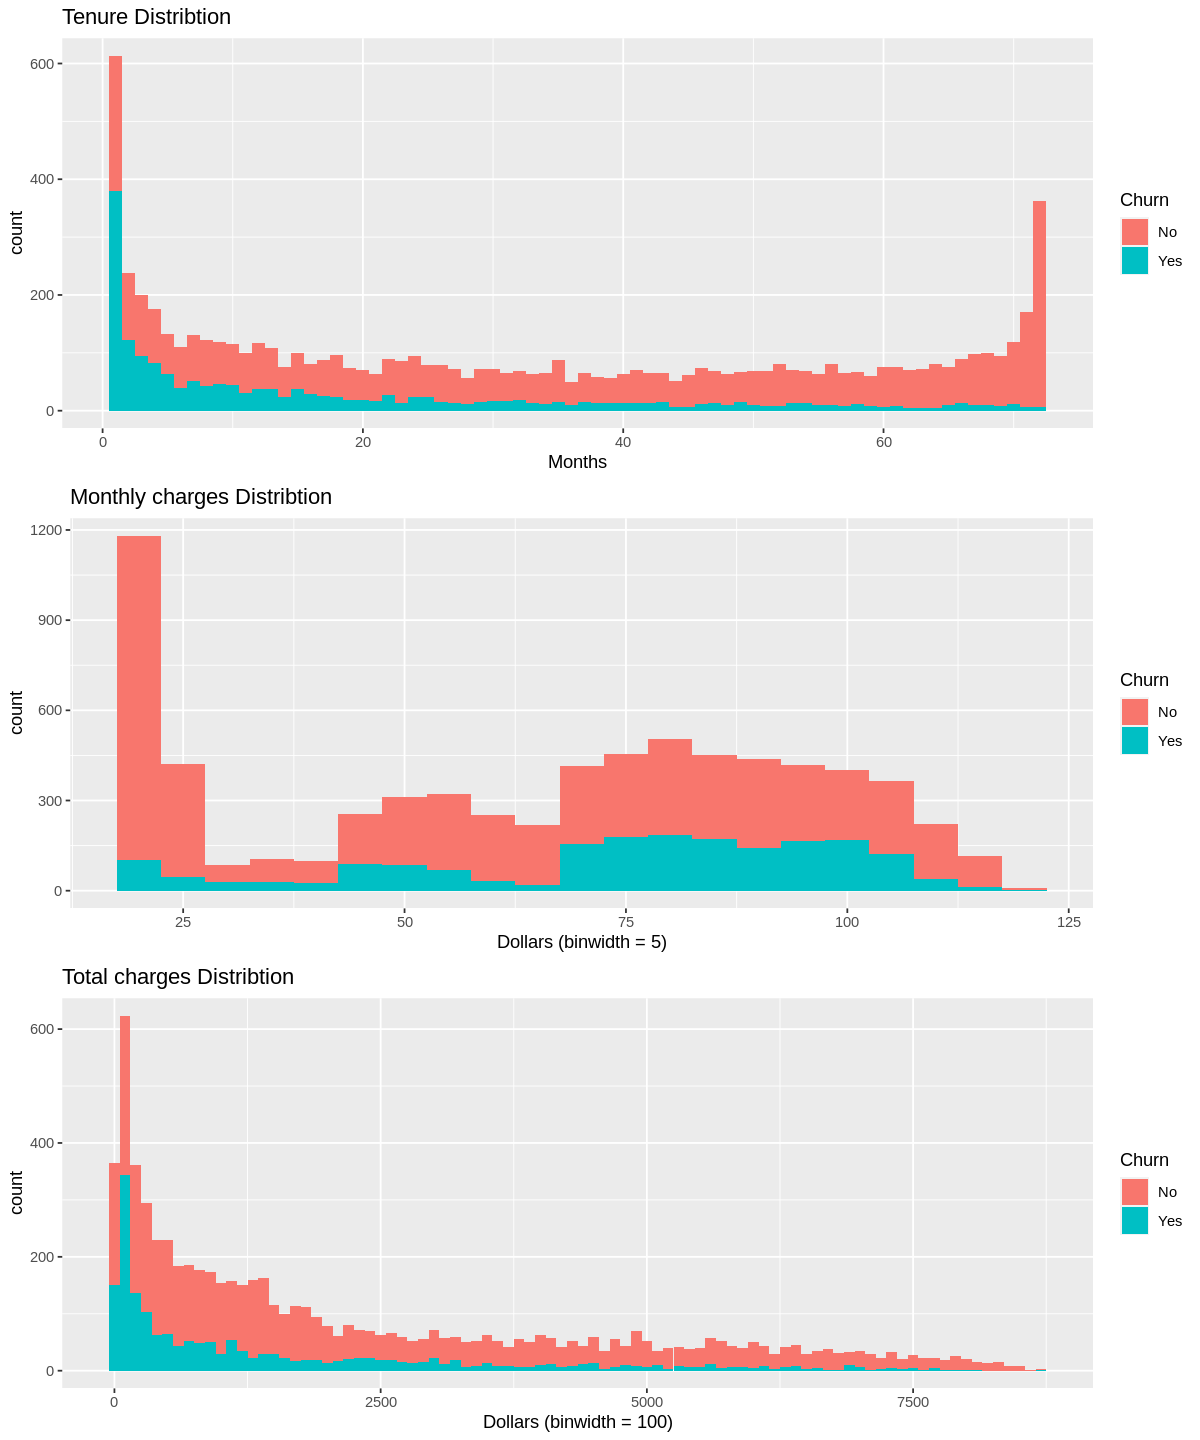

In [ ]:
options(repr.plot.width=10, repr.plot.height=12)

#Tenure histogram
p17 <- ggplot(datc, aes(x = tenure, fill =Churn)) +
  geom_histogram(binwidth = 1) +
  labs(x = "Months",
       title = "Tenure Distribtion")

#Monthly charges histogram
p18 <- ggplot(datc, aes(x = MonthlyCharges, fill =Churn)) +
  geom_histogram(binwidth = 5) +
  labs(x = "Dollars (binwidth = 5)",
       title = "Monthly charges Distribtion")

#Total charges histogram
p19 <- ggplot(datc, aes(x = TotalCharges, fill =Churn)) +
  geom_histogram(binwidth = 100) +
  labs(x = "Dollars (binwidth = 100)",
       title = "Total charges Distribtion")
#Plot quantitative data within a grid
grid.arrange(p17, p18, p19, ncol=1)

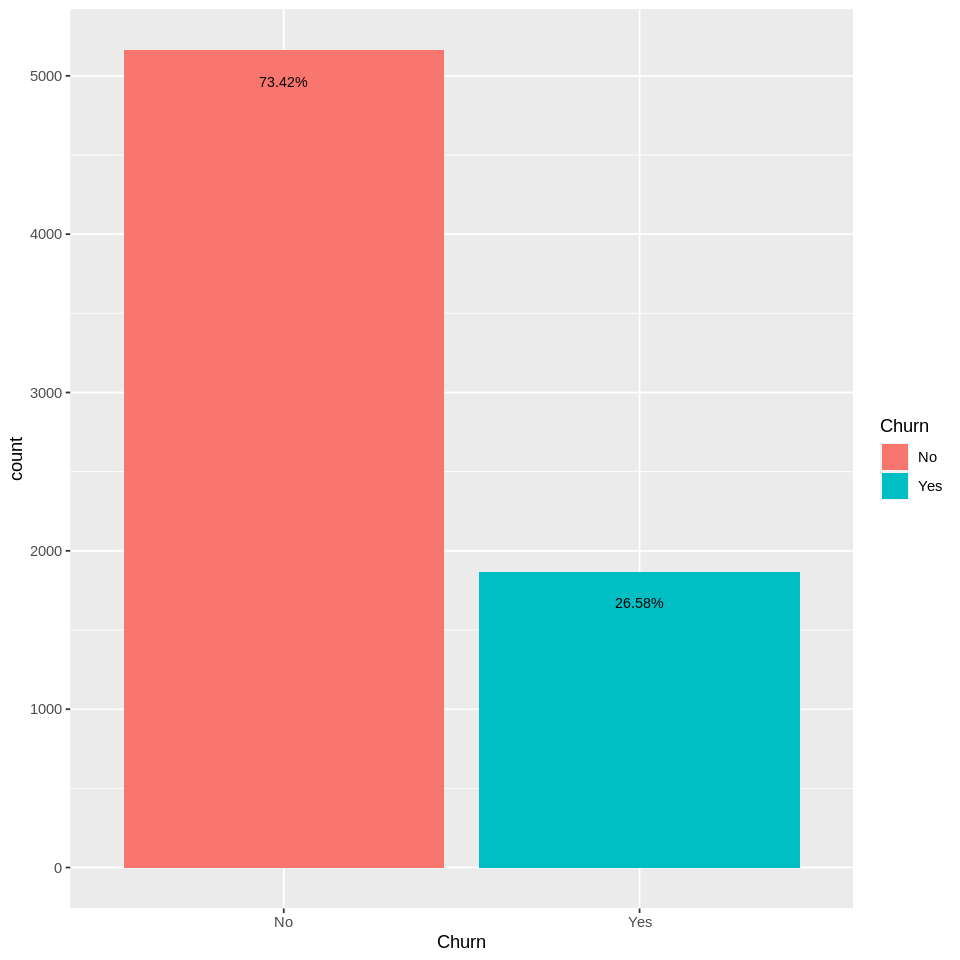

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
p20 <- ggplot(datc, aes(x = Churn, fill = Churn)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3)
p20


**5.Statistical modeling**

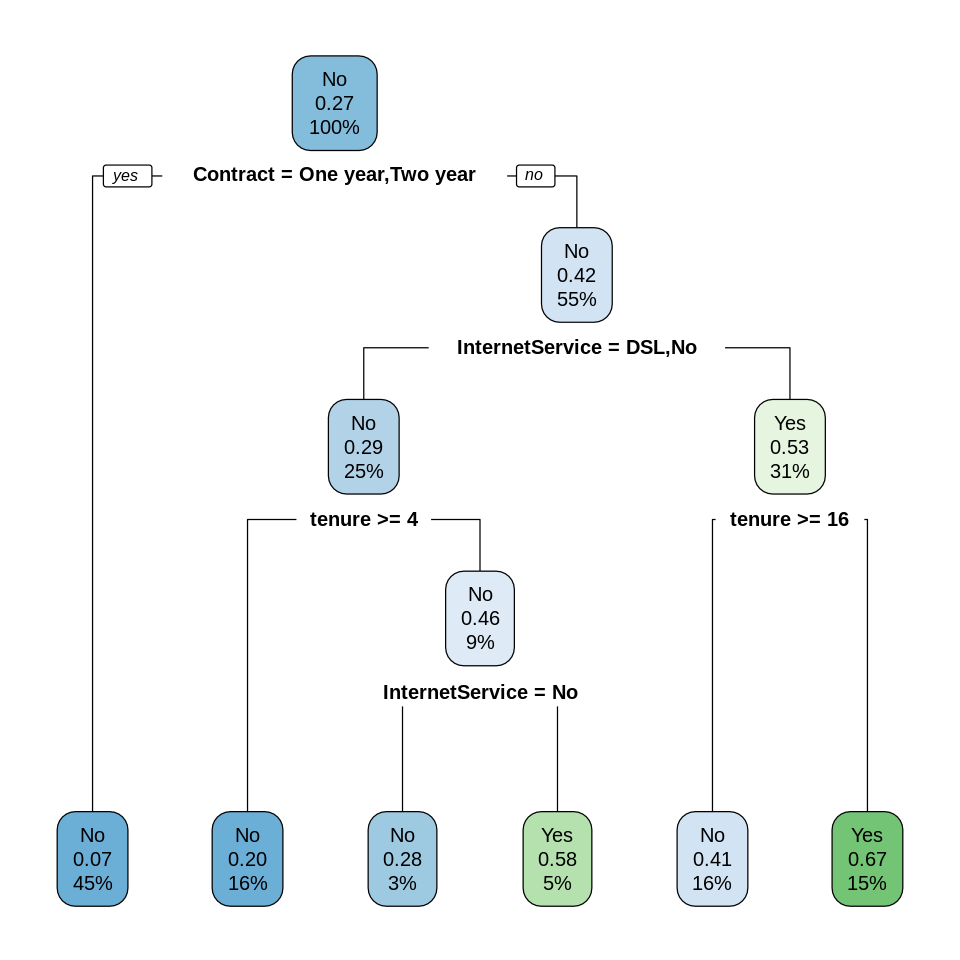

In [ ]:
tr_fit <- rpart(Churn ~., data = dtrain, method="class")
rpart.plot(tr_fit)

In [ ]:
tr_prob1 <- predict(tr_fit, dtest)
tr_pred1 <- ifelse(tr_prob1[,2] > 0.5,"Yes","No")
table(Predicted = tr_pred1, Actual = dtest$Churn)

         Actual
Predicted   No  Yes
      No  1406  284
      Yes  142  276

In [ ]:
tr_prob2 <- predict(tr_fit, dtrain)
tr_pred2 <- ifelse(tr_prob2[,2] > 0.5,"Yes","No")
tr_tab1 <- table(Predicted = tr_pred2, Actual = dtrain$Churn)
tr_tab2 <- table(Predicted = tr_pred1, Actual = dtest$Churn)
tr_acc <- sum(diag(tr_tab2))/sum(tr_tab2)
tr_acc

[1] 0.7979127

In [ ]:
#Set control parameters for random forest model selection
ctrl <- trainControl(method = "cv", number=5, 
                     classProbs = TRUE, summaryFunction = twoClassSummary)

#Exploratory random forest model selection
rf_fit1 <- train(Churn ~., data = dtrain,
                 method = "rf",
                 ntree = 75,
                 tuneLength = 5,
                 metric = "ROC",
                 trControl = ctrl)
rf_fit1

Random Forest 

4924 samples
  19 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3939, 3940, 3939, 3939, 3939 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.8323904  0.9219917  0.4445936
   7    0.8225269  0.8932227  0.4858589
  12    0.8170536  0.8932227  0.4889035
  17    0.8151797  0.8874136  0.4866193
  23    0.8144833  0.8940526  0.4919745

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

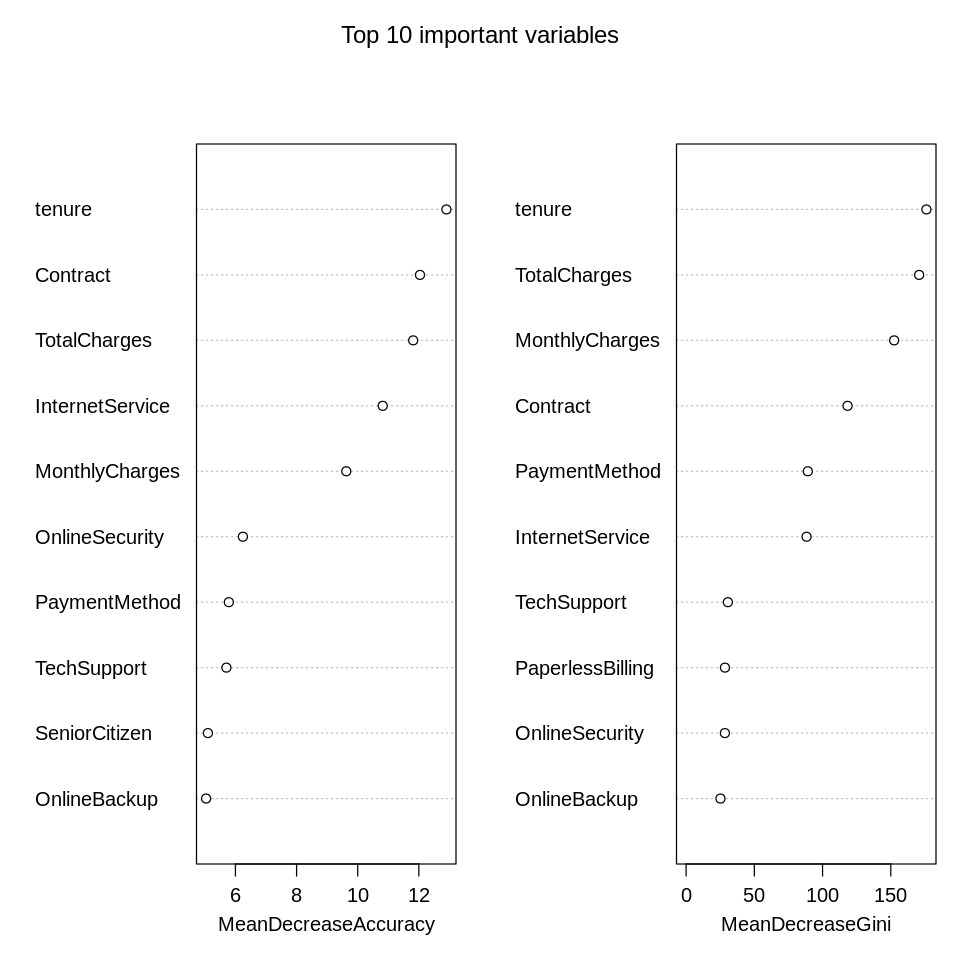

In [ ]:
#Run optimal model
rf_fit2 <- randomForest(Churn ~., data = dtrain, 
                        ntree = 75, mtry = 2, 
                        importance = TRUE, proximity = TRUE)

#Display variable importance from random tree
varImpPlot(rf_fit2, sort=T, n.var = 10, 
           main = 'Top 10 important variables')

In [ ]:
rf_pred1 <- predict(rf_fit2, dtest)
table(Predicted = rf_pred1, Actual = dtest$Churn)

         Actual
Predicted   No  Yes
      No  1426  298
      Yes  122  262

In [ ]:
rf_pred2 <- predict(rf_fit2, dtrain)
rf_tab1 <- table(Predicted = rf_pred2, Actual = dtrain$Churn)
rf_tab2 <- table(Predicted = rf_pred1, Actual = dtest$Churn)
rf_acc <- sum(diag(rf_tab2))/sum(rf_tab2)
rf_acc

[1] 0.800759

In [ ]:
lr_fit <- glm(Churn ~., data = dtrain,
          family=binomial(link='logit'))
summary(lr_fit)


Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = dtrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8966  -0.6818  -0.2767   0.7457   3.2597  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           1.232e+00  9.637e-01   1.278 0.201258    
genderMale                           -1.242e-02  7.748e-02  -0.160 0.872611    
SeniorCitizenYes                      2.358e-01  1.001e-01   2.355 0.018532 *  
PartnerYes                           -7.698e-02  9.255e-02  -0.832 0.405513    
DependentsYes                        -1.896e-01  1.071e-01  -1.770 0.076691 .  
tenure                               -6.960e-02  7.728e-03  -9.006  < 2e-16 ***
PhoneServiceYes                      -1.368e-01  7.678e-01  -0.178 0.858579    
MultipleLinesYes                      3.824e-01  2.088e-01   1.832 0.067023 .  
InternetServiceFiber optic            1.316e+00  9.422e-01   1.396 0.

In [ ]:
lr_prob1 <- predict(lr_fit, dtest, type="response")
lr_pred1 <- ifelse(lr_prob1 > 0.5,"Yes","No")
table(Predicted = lr_pred1, Actual = dtest$Churn)

         Actual
Predicted   No  Yes
      No  1403  247
      Yes  145  313

In [ ]:
lr_prob2 <- predict(lr_fit, dtrain, type="response")
lr_pred2 <- ifelse(lr_prob2 > 0.5,"Yes","No")
lr_tab1 <- table(Predicted = lr_pred2, Actual = dtrain$Churn)
lr_tab2 <- table(Predicted = lr_pred1, Actual = dtest$Churn)
lr_acc <- sum(diag(lr_tab2))/sum(lr_tab2)
lr_acc

[1] 0.8140417

**6.Data visualization based on models**

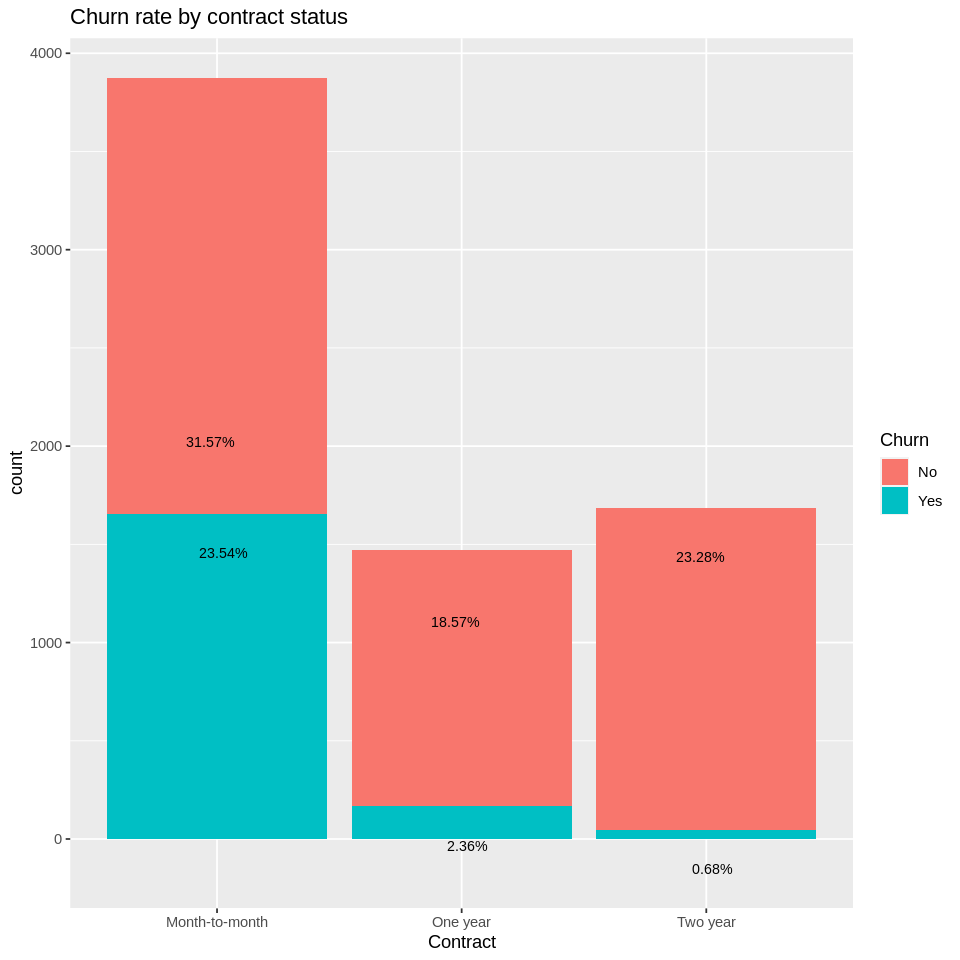

In [ ]:
p21 <- ggplot(datc, aes(x = Contract, fill = Churn)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3) +
  labs(title="Churn rate by contract status")

p21

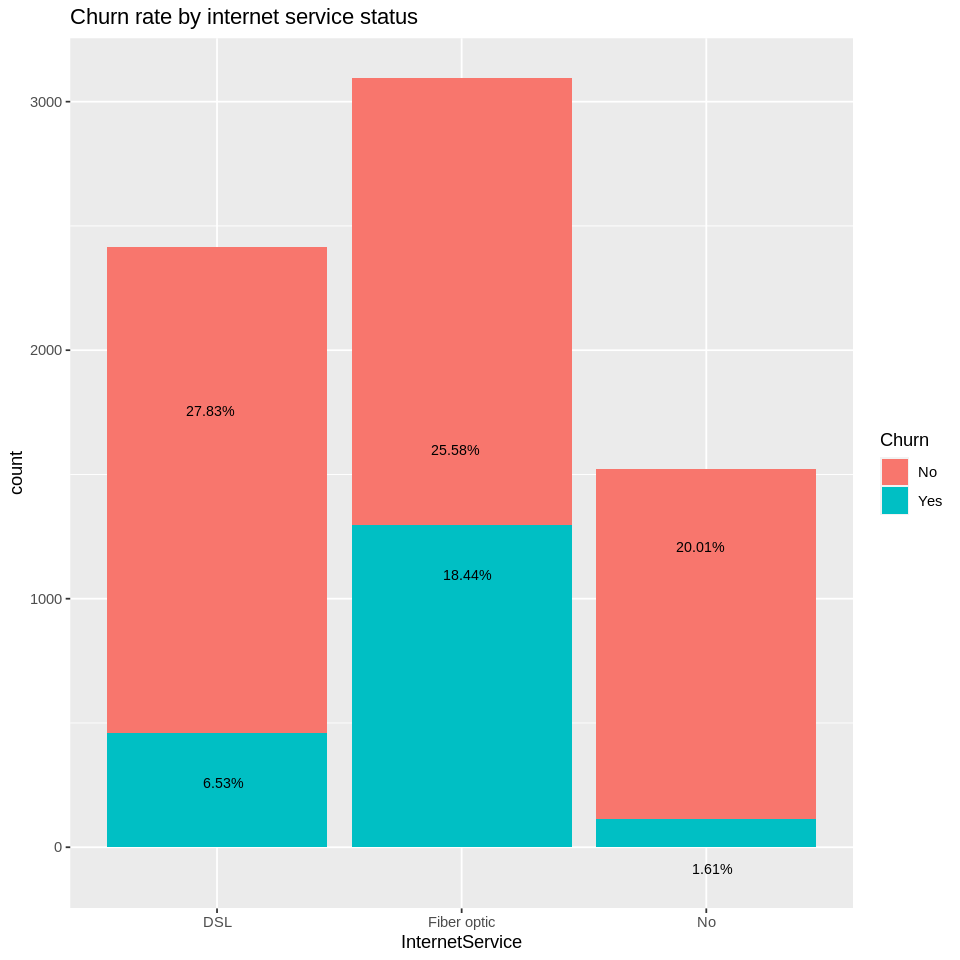

In [ ]:
p22 <- ggplot(datc, aes(x = InternetService, fill = Churn)) +
  geom_bar() +
  geom_text(aes(y = ..count.. -200, 
                label = paste0(round(prop.table(..count..),4) * 100, '%')), 
            stat = 'count', 
            position = position_dodge(.1), 
            size = 3) +
  labs(title="Churn rate by internet service status")

p22

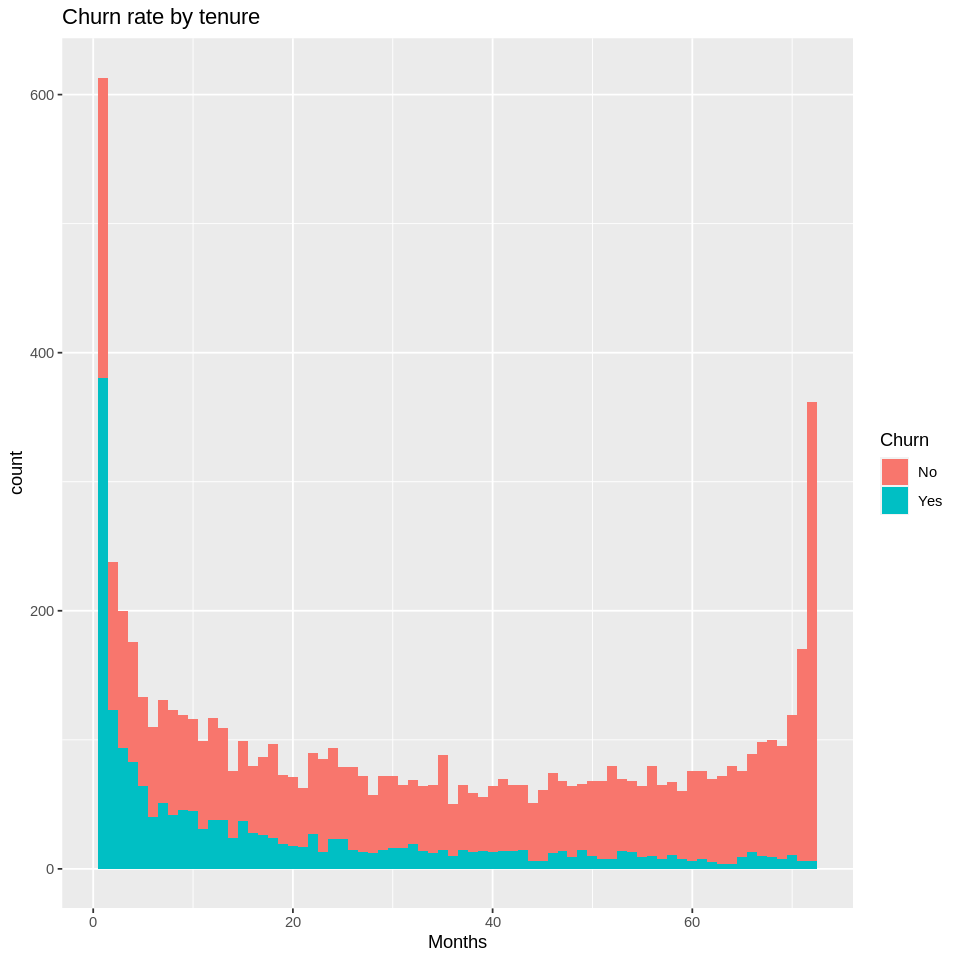

In [ ]:
p23 <- ggplot(datc, aes(x = tenure, fill = Churn)) +
  geom_histogram(binwidth = 1) +
  labs(x = "Months",
       title = "Churn rate by tenure")
p23

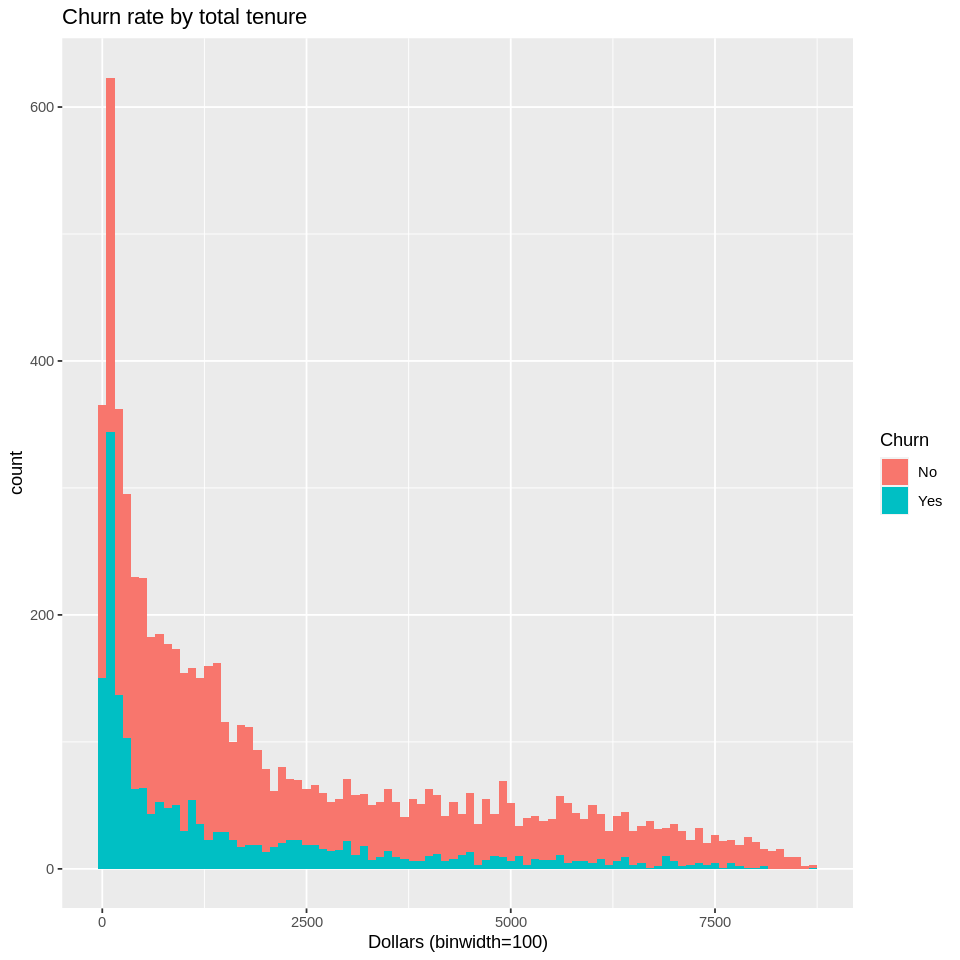

In [ ]:
p24 <- ggplot(datc, aes(x = TotalCharges, fill = Churn)) +
  geom_histogram(binwidth = 100) +
  labs(x = "Dollars (binwidth=100)",
       title = "Churn rate by total tenure")
p24

**7.Conclusion**

After going through various preparatory steps including data/library loading and preprocessing, we carried out three statistical classification methods common in churn analysis. We identified several important churn predictor variables from these models and compared these models on accuracy measures.

Here is a summary of our findings:

Customers with month-to-month contracts are less likely to churn.
Customers with internet service, in particular fiber optic service, are more likely to churn.
Customers who have been with the company longer or have paid more in total are less likely to churn.
Logistic regression, although a less complicated method, outperformed machine-learning based methods of decion tree and random forest analysis. Althouth logistic regression performed slightly less in terms of false negatives, it had a better false positive rate and was more accurate overall.